In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from itertools import izip
import tensorflow as tf
from tf_vgg.kaggle_data import *
from tf_vgg import vgg16_bw, utils, vgg16, lung_utils
import matplotlib.pyplot as plt
import os

In [3]:
# get lung collection

raw_lungs = get_training_lungs()
labels = get_training_lung_labels()
HU_MIN = -1500
HU_MAX = 500
def preprocess(images):
    for image, label in images:
        yield lung_utils.hu_to_visual_features(image, HU_MIN, HU_MAX), label
lungs = preprocess(raw_lungs)

(60, 224, 224)
059d8c14b2256a2ba4e38ac511700203
1


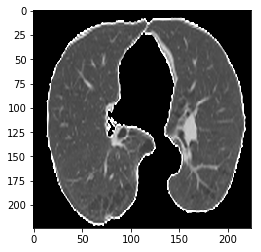

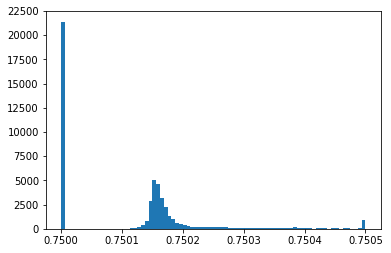

In [3]:
# visualize a slice of a lung

for tup,label in izip(lungs, labels):
    print tup[0].shape
    print tup[1]
    print label
    plt.imshow(tup[0][30], cmap=plt.cm.gray)
    plt.show()
    plt.hist(tup[0][30].flatten(), bins=80)
    plt.show()
    break

In [4]:
# function to map lung to features using vgg

weights_file = './tf_vgg/vgg16.npy'

def preprocess_slice(s):
    return np.repeat([s], 3, axis=0).transpose(1, 2, 0)[None,:,:,:]

def vgg_features(lungs_iterable):
    with tf.device('/gpu:0'):
        with tf.Session() as sess:
            images = tf.placeholder("float", [1, 224, 224, 3])

            vgg = vgg16.Vgg16(weights_file)
            with tf.name_scope("content_vgg"):
                vgg.build(images)

            for lung, label in lungs_iterable:
                yield np.concatenate([sess.run(vgg.pool5, feed_dict=\
                                               {images: preprocess_slice(i)})\
                                      for i in lung]), label

npy file loaded
build model started
build model finished: 0s
lung: 66b7666912e1d469cd9817a1cade694c
features.shape: (60, 7, 7, 512)
features hist:


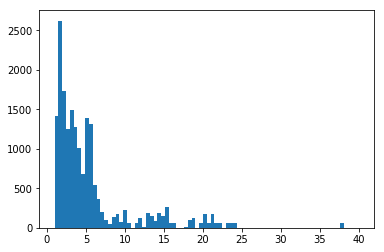

In [5]:
# test it out

for lung_features, label in vgg_features(lungs):
    print "lung: {}".format(label)
    print "features.shape: {}".format(lung_features.shape)
    print "features hist:"
    plt.hist(lung_features.flatten(), bins=80, range=[1,40])
    plt.show()
    break

In [6]:
# map all lungs to their features tensors and write to disk
features_dir = './input/vgg_training'

if not os.path.exists(features_dir):
    os.makedirs(features_dir)
for i, (lung_features, label) in enumerate(vgg_features(lungs)):
    print "Getting features for lung: {}, ({})".format(label, i)
    outfile = os.path.join(features_dir, '{}.npy'.format(label))
    np.save(outfile, lung_features)
    print "Saved features for lung: {} to {}".format(label, outfile)

npy file loaded
build model started
build model finished: 0s
Getting features for lung: ca3cdb2e771df9989df5a9cb0296c44c, (0)
Saved features for lung: ca3cdb2e771df9989df5a9cb0296c44c to ./input/vgg_training/ca3cdb2e771df9989df5a9cb0296c44c.npy
Getting features for lung: fd4c2d4738bc25a5c331dbc101f3323a, (1)
Saved features for lung: fd4c2d4738bc25a5c331dbc101f3323a to ./input/vgg_training/fd4c2d4738bc25a5c331dbc101f3323a.npy
Getting features for lung: 0d19f1c627df49eb223771c28548350e, (2)
Saved features for lung: 0d19f1c627df49eb223771c28548350e to ./input/vgg_training/0d19f1c627df49eb223771c28548350e.npy
Getting features for lung: c020f5c28fc03aed3c125714f1c3cf2a, (3)
Saved features for lung: c020f5c28fc03aed3c125714f1c3cf2a to ./input/vgg_training/c020f5c28fc03aed3c125714f1c3cf2a.npy
Getting features for lung: 64a5a866461a3b6006efb0075e04dffe, (4)
Saved features for lung: 64a5a866461a3b6006efb0075e04dffe to ./input/vgg_training/64a5a866461a3b6006efb0075e04dffe.npy
Getting features fo

In [4]:
i = 0
for label in labels:
    i += 1
    
print i

1397
